## Regressão Linear

Até agora foram vistos alguns conceitos de classificação. Outro importante aspecto do aprendizado supervisionado são os modelos de aprendizagem para problemas de regressão. Nestes problemas, a saída esperada é contínua, em vez de valores discretos como na classificação.

Um conjunto de dados de propaganda é disponibilizado junto com esse notebook, onde cada linha indica um tipo de mercado diferente. Importe os dados para visualizar a estrutura deles:

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('ad.data', index_col=0)
display(data.head())

In [ ]:
data.shape

Quais são os atributos?
- **TV:** dólares gastos em propagandas veiculadas na TV para um produto em determinado mercado (em milhões)
- **Radio:** dólares gastos em propagandas veiculadas em rádio
- **Newspaper:** dólares gastos com propaganda em jornais

Qual o rótulo da amostra?
- **Sales:** vendas (em milhares) de um determinado item em um mercado específico

Para facilitar, os dados também poderiam ser visualizados para compreender melhor com a distribuição, e se há alguma tendência.

In [ ]:
import seaborn as sns
%matplotlib inline

sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

## Regressão Linear

Uma das formas de resolver um problema desse tipo é aplicando a regressão linear. Nesse método, procura-se uma função capaz de traçar uma linha de tendência que servirá para prever um valor futuro em determinadas condições. A vantagem é que é um modelo matematicamente simples de interpretar. A desvantagem é que dificilmente levará a uma acurácia satisfatória.

### Forma da regressão linear:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ é a saída
- $\beta_0$ é um valor de bias (deslocamento)
- $\beta_1$ é o coeficiente de $x_1$ (do primeiro atributo)
- $\beta_n$ é o coeficiente de $x_n$ (do n-ésimo atributo)

Assim, para esse problema, tem-se:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Os valores $\beta$ são chamados de **coeficientes de modelo** e são ajustados na etapa de aprendizagem, a qual acontece com o ajuste do modelo utilizando o critério dos "quadrados mínimos". Uma vez aprendidos esses parâmetros, o modelo pode ser usado de forma preditiva!

### Separando os atributos da classe

In [ ]:
atributos = ['TV', 'Radio', 'Newspaper']

X = data[atributos]
X.head()

In [ ]:
y = data['Sales']
y.head()

Em seguida, é necessário dividir quais dados serão apresentados na etapa de treino e quais dados serão apresentados na etapa de teste:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1) 

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

### Regressão linear no scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

modelo.fit(X_train, y_train)

In [ ]:
print(modelo.intercept_)
print(modelo.coef_)

In [ ]:
list(zip(atributos, modelo.coef_)) # o comando zip junta dois vetores e forma tuplas

$$y = 2.93 + 0.0469 \times TV + 0.176 \times Radio + 0.002 \times Newspaper$$

Como interpretar **o coeficiente da variável TV** (0.0469)?

Para uma dada quantia gasta com de Radio e Newspaper, **um adicional de $1.000 gastos com TV** reflete diretamente na **venda de 46.6 itens**, segundo esse modelo.

### Predição

In [ ]:
modelo.predict([[100,20,15]])

No cenário dado, era esperado a venda de aproximadamente **11,2 milhões** de itens de produto.

### Avaliação de modelos de regressão

Métricas como acurácia são comuns em problemas de classificação, mas não se aplicam em problemas de regressão. No lugar desta, são utilizadas métricas específicas para valores contínuos.

In [ ]:
true = np.array([100, 50, 30, 20])
pred = np.array([90, 50, 50, 30])

**Mean Absolute Error** (MAE) é a média absoluta dos erros:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [ ]:
# calculando MAE com scikit
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

**Mean Squared Error** (MSE) é a média do quadrado dos erros:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [ ]:
# calculando MSE com scikit
print(metrics.mean_squared_error(true, pred))

**Root Mean Squared Error** (RMSE) é a raiz quadrada da média do quadrado dos erros:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [ ]:
# calculando RMSE com scikit
print(np.sqrt(metrics.mean_squared_error(true, pred)))

**Mean absolute percentage error** (MAPE) é a média do erro absoluto em percentual:

$$\displaystyle {\mbox{M}}={\frac {100\%}{n}}\sum _{t=1}^{n}\left|{\frac{y_i-\hat{y}_i}{y_i}}\right|$$

In [ ]:
# calculando MAPE com numpy -- pq não tem no scikit :(
print(np.mean(np.abs((true - pred) / true)) * 100)

A comparação entre as diferentes métricas:

- **MAE** é a mais fácil de entender, porque é uma média.
- **MSE** é mais popular que a MAE porque pune erros maiores.
- **RMSE** é ainda mais popular porque, além das características anteriores, é interpretável em termos da variável de saída.
- **MAPE** é interpretável em termos percentual, porém é necessário tomar cuidado com a divisão por zero

### Calculando RMSE para as predições de Vendas

In [ ]:
y_pred = modelo.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

### Validação Cruzada

In [ ]:
from sklearn.model_selection import KFold

X = data[atributos].values
y = data.Sales.values

kf = KFold(n_splits = 10, random_state = 42)

scores = []

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    score = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    scores.append(score)
    
scores = np.array(scores)

print("MAPE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

## Exercício

Utilizando a base de dados de Boston sobre preços de casa, desenvolva um modelo capaz de prever o preço das casas com o menor erro possível Para esse experimento, considere outros regressores e faça o pré-processamento dos atributos que achar necessário. Explique minimamente os passos dos códigos dos experimentos para que fique compreensível o que foi feito. 

*Avaliação: A pontuação dessa atividade será normalizada pelo menor resultado da sala obtido ao professor executar os notebooks com a célula de teste (a última). Quanto mais próximo seu resultado estiver do menor resultado da sala, maior será a nota obtida na tarefa. O piso da nota será de 5,0 para os experimentos corretamente elaborados e inferior a 5,0 mediante os problemas encontrados no experimento.*

**Informações sobre a base:** https://scikit-learn.org/stable/datasets/index.html#boston-dataset

**Outros métodos de regressão:** https://scikit-learn.org/stable/supervised_learning.html

In [10]:
from sklearn.datasets import load_boston

BostonData = load_boston()
X, y = load_boston(return_X_y = True)

## utilize os recursos aprendidos no módulo 1 para analisar
## se seu modelo tem qualidade e programe o que for necessário a partir desse ponto


# dfBoston

In [31]:
# importar as bibliotecas do numpy, seaborn, pandas
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
dfBoston = pd.DataFrame(dfBoston.data, columns=dfBoston.feature_names)

In [15]:
dfBoston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [25]:
dfBoston.cosns.corrplot(df)rr()
#plt.savefig('attribute_correlations.png', tight_layout=True)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


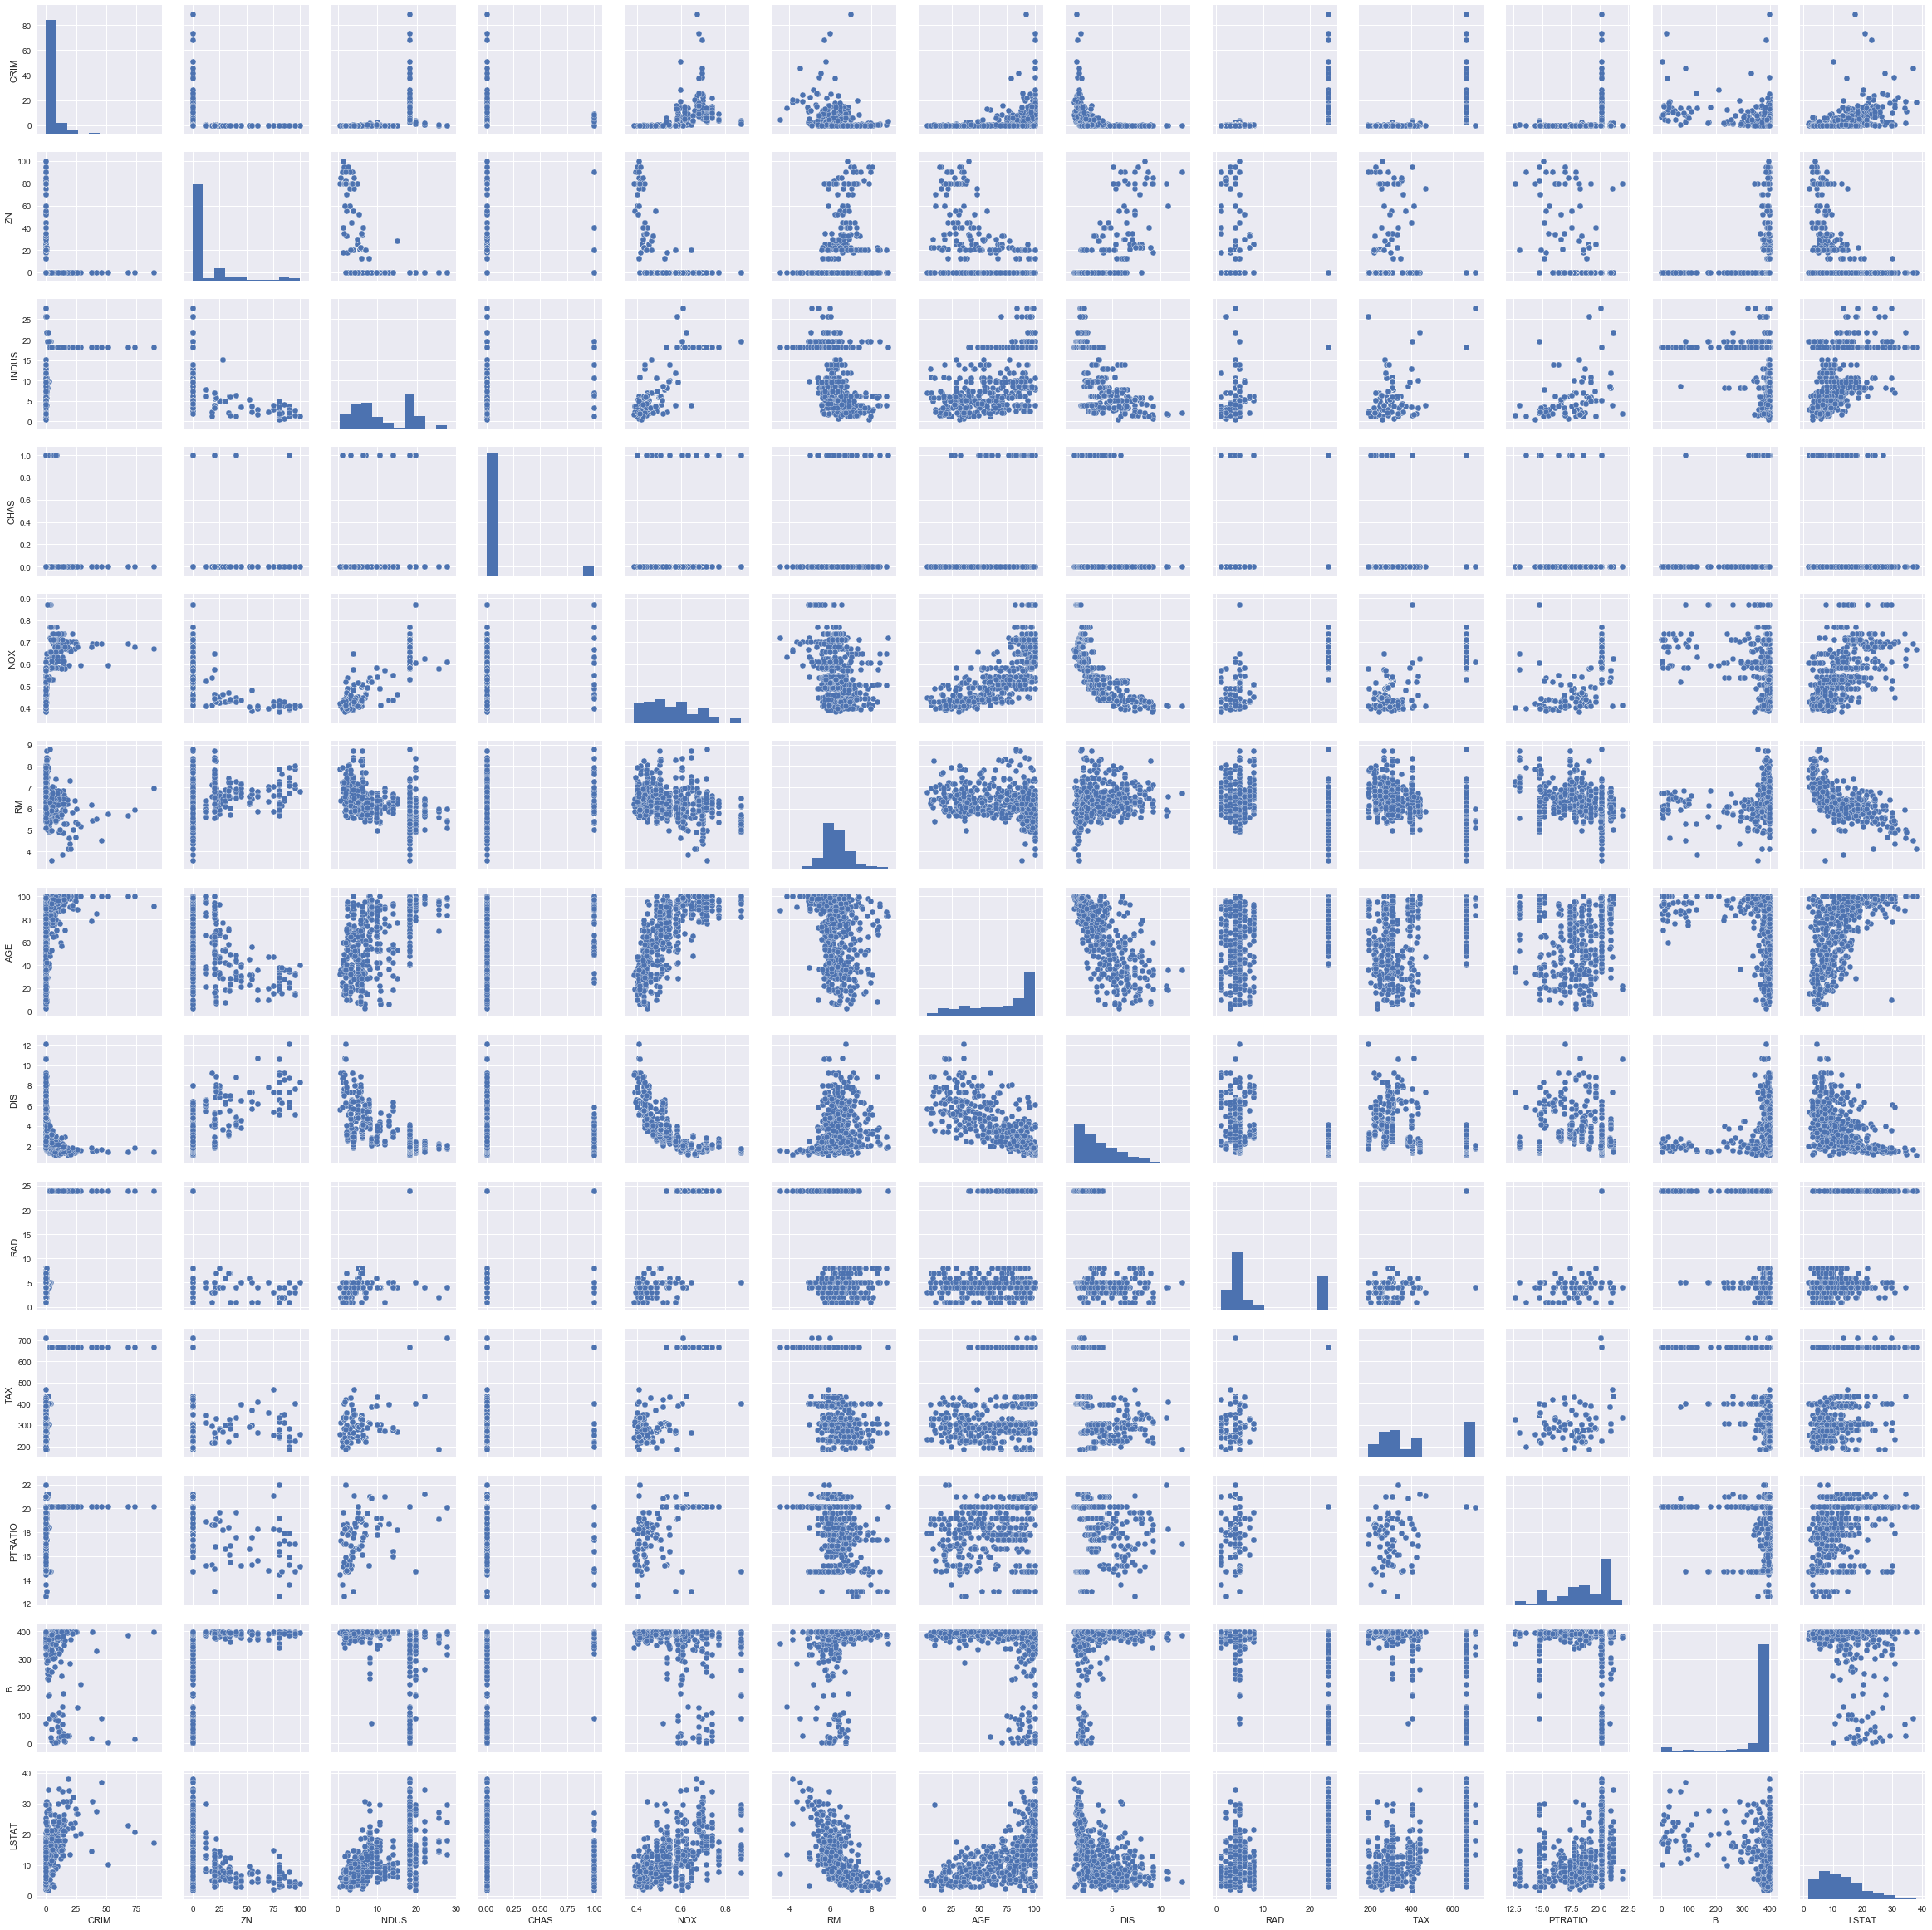

In [40]:
g = sns.pairplot(dfBoston)

(array([439.,  44.,  14.,   1.,   3.,   2.,   0.,   1.,   1.,   1.]),
 array([6.3200000e-03, 8.9033080e+00, 1.7800296e+01, 2.6697284e+01,
        3.5594272e+01, 4.4491260e+01, 5.3388248e+01, 6.2285236e+01,
        7.1182224e+01, 8.0079212e+01, 8.8976200e+01]),
 <a list of 10 Patch objects>)

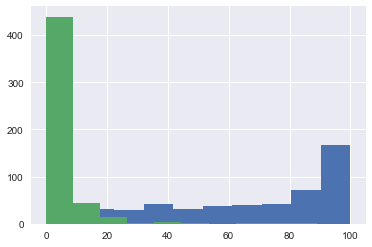

In [51]:
attrAge = dfBoston['AGE']
attrCrime = dfBoston['CRIM']

plt.hist(attrAge)
plt.hist(attrCrime)

In [ ]:
from sklearn.model_selection import train_test_split

X_t, y_t = load_boston(return_X_y = True)

# use test_size = 0.2, o random_state eu vou alterar depois para um número secreto
_, X_test, _, y_test = train_test_split(X_t, y_t, test_size=0.2, random_state=42) 

### neste espaço, faça o mesmo pré-processamento que fez na criação do seu modelo
### lembre, a variavel "modelo" já deverá ter sido criada na célula anterior




### fim do espaço do pré-processamento

y_pred = modelo.predict(X_test)
resultado = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(resultado)